# <center>ECON 725: Computer Programming and Data Management in Economics <a class="tocSkip"></center>    
# <center> Introduction to Natural Language Processing <a class="tocSkip"></center>

## Learning Objectives
<hr>

- Understand the basics of Natural Language Processing (NLP)
- Learn about common NLP tasks such as tokenization, stemming, and lemmatization
- Explore various NLP applications like sentiment analysis and text classification
- Get hands-on experience with popular NLP libraries such as NLTK

# What is Natural Language Processing (NLP)?

NLP is a branch of artificial intelligence that deals with analyzing, understanding, and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages.

<center><img width="50%" src="img/NLP-image-scaled.jpg"/></center>

## Applications of NLP
* Machine Translation (e.g., Google Translate)
* Natural Language Generation (e.g., chatGPT)
* Web Search
* Spam filters
* Sentiment Analysis

... and many others

### 1) Data Cleaning:

In the data cleaning process, we remove special characters, symbols, punctuation, HTML tags<>, etc from the raw data which contains no information for the model to learn, these simply noise in our data.

This process also depends on the problem statement, like what to remove from raw text. For example, if the problem contains text from the economics or business world then symbols like $ or other currency symbols may contain some hidden information that we do not want to lose. But in most cases we remove them.

In [1]:
import re

#sample review from the IMDB dataset.
review = "<b>A touching movie!!</b> It is full of emotions and wonderful acting.<br> I could have sat through it a second time."

cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) #taking only words

print(cleaned_review)

A touching movie It is full of emotions and wonderful acting I could have sat through it a second time 


### 2) Preprocessing of data:

    | Preprocessing of data is a data mining technique that involves transforming the raw data into an understandable format. 


#### Lowercase:
Making all the text lower case is one of the simplest and most effective forms of text preprocessing.

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*PeAYrvLkXGU587TLDfgq1w.png"/></center>


In [2]:
# Lowercase

cleaned_review = cleaned_review.lower()

print(cleaned_review)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 


#### Tokenization
    | Tokenization is the process of breaking up text document into individual words called tokens.

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/marcelortiz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Tokenization

from nltk.tokenize import word_tokenize

tokens = word_tokenize(cleaned_review)

print(cleaned_review)
print(tokens)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 
['a', 'touching', 'movie', 'it', 'is', 'full', 'of', 'emotions', 'and', 'wonderful', 'acting', 'i', 'could', 'have', 'sat', 'through', 'it', 'a', 'second', 'time']


As seen above sentence is broken down into words(tokens). Natural language toolkit (`nltk`) is a popular open source library used extensively for NLP tasks. For this lecture, we will use `nltk` for all the text preprocessing steps.

#### Stop words removal:
    | Stop words are common words that do not contribute much of the information in a text document. Words like ‘the’, ‘is’, ‘a’ have less value and add noise to the text data.

There is an in-built stopword list in NLTK which we can use to remove stop words from text documents. However this is not the standard stopwords list for every problem, we can also define our own set of stopwords based on the domain.

In [5]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcelortiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Stop words removal

# nltk.download('stopwords') 
# you have to download the set of stop words the first time
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['touching', 'movie', 'full', 'emotions', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


NLTK has a predefined list of stop words. We can add or remove stopwords from this list or use them as it is based on the specific task.

### Stemming:

    | Stemming is the process of reducing a word to its stem/root word. 

It reduces inflection in words (e.g. ‘help’, ’helping’, ’helped’, ’helpful’) to their root form (e.g. ‘help’). It removes the morphological affixes from words, leaving only the word stem.

<center><img width="30%" src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*ZLdN6Z_fn873jbD8TmJ96Q.png"/></center>


In [7]:
# Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = [stemmer.stem(word) for word in filtered_review]

print(stemmed_review)

['touch', 'movi', 'full', 'emot', 'wonder', 'act', 'could', 'sat', 'second', 'time']


The stem word may or may not be a valid word in the language. For example ‘movi’ is the root word for ‘movie’, and ‘emot’ is the root word for ‘emotion’.

#### Lemmatization:

    | Lemmatization does the same thing as stemming, converting a word to its root form but with one difference i.e., the root word, in this case, belongs to a valid word in the language. 

For example, the word caring would map to ‘care’ and not ‘car’ in case of stemming.

In [8]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcelortiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marcelortiz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['touching', 'movie', 'full', 'emotion', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


WordNet is a database of valid words in the English language. NLTK’s WordNetLemmatizer() uses valid words from WordNet.

#### N-grams

    | N-grams are the combination of multiple words used together, Ngrams with N=1 is called unigrams. Similarly, bigrams (N=2), trigrams (N=3), and so on can also be used.

N-grams can be used when we want to preserve sequence information in the document, like what word is likely to follow the given one. E.g., difference in differences. Unigrams don’t contain any sequence information because each word is taken individually.

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*tufb2Ea4ZBVydTuvrIUT5A.png"/></center>


## Text Data Vectorization:
    | The process of converting text into numbers is called text data vectorization. Now after text preprocessing, we need to numerically represent text data i.e., encoding the data in numbers which can be further used by algorithms.

#### Bag of words(BOW):
It is one of the simplest text vectorization techniques. The intuition behind BOW is that two sentences are said to be similar if they contain a similar set of words.

In NLP tasks, each text sentence is called a document and collection of such documents is referred to as text corpus. Consider these two sentences:

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*hjC8eHW5JrisXCjQZm6WSA.jpeg"/></center>


BOW constructs a dictionary of d unique words in the corpus(collection of all the tokens in data). For example corpus in the above image is made up of combined words in S1 and S2.

Now, we can think of like creating a table where columns are all the set of unique words in the corpus with each row corresponding to a sentence(document). We set the value as 1 if the word is present in the sentence else we set it to 0.


<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*oByoDP8SXq4PX62ej2v9yg.jpeg"/></center>

This will create a matrix of $d \times n$ where $d$ is the total number of unique tokens in the corpus and $n$ equals the number of documents. In the above example, the matrix will be of shape $11 \times 2$.

#### Term Frequency - Inverse Document Frequence (TF-IDF)

    | Weight rare words higher that common words. 

Term Frequency defines the probability of finding a word in the document. Now let’s say we want to find what is the probability of finding a word $w_i$ in document $d_j$.

$$

TF(w_i, d_j) = \frac{\text{number of times $w_i$ occurs in $d_j$}}{\text{total number of words in $d_j$}}
$$

The intuition behind IDF is that a word is not of much use if it is appearing in all the documents. It defines how unique is the word in the total corpus.

$$

IDF(w_i, D_c) = log(N/n_i)
$$

where $D_c$ represent all documents in the corpus, $N$ is the total number of documents and $n_i$ is the number of document which contains word $w_i$.

* If $w_i$ is more frequent in the corpus then IDF value decreases.

* If $w_i$ is not frequent which means $n_i$ decreases and hence IDF value increases.

# Application: IMDB Movie Reviews

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*jp-t7Y4H0D6GtYgO"/></center>

**About**:
The dataset contains a collection of 50,000 reviews from the IMDB Website with an equal number of positive and negative reviews. The task is to predict the polarity (positive or negative) of a given review(text).

In [14]:
# get IMDB Dataset: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!curl -L -o aclImdb_v1.tar.gz http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3795k      0  0:00:21  0:00:21 --:--:-- 8174k82k


In [15]:
# extract downloaded files
!tar xvzf aclImdb_v1.tar.gz

x aclImdb/
x aclImdb/test/
x aclImdb/train/
x aclImdb/test/neg/
x aclImdb/test/pos/
x aclImdb/train/neg/
x aclImdb/train/pos/
x aclImdb/train/unsup/
x aclImdb/imdbEr.txt
x aclImdb/imdb.vocab
x aclImdb/README
x aclImdb/test/labeledBow.feat
x aclImdb/test/urls_neg.txt
x aclImdb/test/urls_pos.txt
x aclImdb/train/unsupBow.feat
x aclImdb/train/labeledBow.feat
x aclImdb/train/urls_neg.txt
x aclImdb/train/urls_pos.txt
x aclImdb/train/urls_unsup.txt
x aclImdb/test/neg/127_3.txt
x aclImdb/test/neg/126_4.txt
x aclImdb/test/neg/125_3.txt
x aclImdb/test/neg/124_2.txt
x aclImdb/test/neg/123_4.txt
x aclImdb/test/neg/122_4.txt
x aclImdb/test/neg/121_4.txt
x aclImdb/test/neg/120_2.txt
x aclImdb/test/neg/119_3.txt
x aclImdb/test/neg/118_1.txt
x aclImdb/test/neg/117_1.txt
x aclImdb/test/neg/116_4.txt
x aclImdb/test/neg/115_3.txt
x aclImdb/test/neg/114_2.txt
x aclImdb/test/neg/113_3.txt
x aclImdb/test/neg/112_2.txt
x aclImdb/test/neg/111_3.txt
x aclImdb/test/neg/110_1.txt
x aclImdb/test/neg/109_4.txt
x a

In [10]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

In [11]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


review  label
0  For a movie that gets no respect there sure ar...      1
1  Bizarre horror movie filled with famous faces ...      1
2  A solid, if unremarkable film. Matthau, as Ein...      1
3  It's a strange feeling to sit alone in a theat...      1
4  You probably all already know this by now, but...      1

#### Exploratory Data Analysis

In [12]:
# No null values in dataset.
df['review'].isnull().sum()

np.int64(0)

In [13]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


In [5]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

"Up And Coming was a very positive sitcom, which brought a tool/and or channel that opened the young minds of the Black Culture. The focus and outlook was a message of positivity for our people, and hope for change. I advise this selection for every American household to experience the struggle, and the reward. The show was never given the chance to blossom into the idea of middle-class Blacks becoming business owners of their own. The issue's were so compatible with real life situation's that impacted the lives of so many. I sincerely hope that the entire volume can be restored, and put on DVD for Americans to enjoy with their families.<br /><br />Thanks."

In [6]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'i was surprised after watching this piece of crap , if you have seen an episode of TOM and JERRY in which jerry pours some liquid onto him and becomes invisible than you are likely to see the same cartoons with added EROTIC topping a man becoming invisible and doing S*i* is the conclusion of the movie. involving too much sex in a cartoon themed movie doesn\'t increase its worth :( , and most of all i was surprised when the same cartoon ending was used to show up the Mr.Invisible and that was really awful i must say , flour drops off the rack and our very own Mr.Invisible becomes Visible "watch ZACK and MIRI make a porno" i bet you wont get bored, <br /><br />1/10 from me'

In [15]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

#### Data preprocessing

In [16]:
import re
# import nltk
# nltk.download('punkt') # At first you have to download these nltk packages.
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    """
    This function takes a review as input and performs the following steps:
    1. Removes HTML tags
    2. Takes only words
    3. Converts review to lowercase
    4. Tokenizes review
    5. Removes stop words
    6. Lemmatizes review
    7. Joins words in preprocessed review
    8. Returns preprocessed review
    """
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
    
    # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [17]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

review  label  \
0  For a movie that gets no respect there sure ar...      1   
1  Bizarre horror movie filled with famous faces ...      1   
2  A solid, if unremarkable film. Matthau, as Ein...      1   
3  It's a strange feeling to sit alone in a theat...      1   
4  You probably all already know this by now, but...      1   

                                 preprocessed_review  
0  movie get respect sure lot memorable quote lis...  
1  bizarre horror movie filled famous face stolen...  
2  solid unremarkable film matthau einstein wonde...  
3  strange feeling sit alone theater occupied par...  
4  probably already know 5 additional episode nev...

Positive reviews word cloud

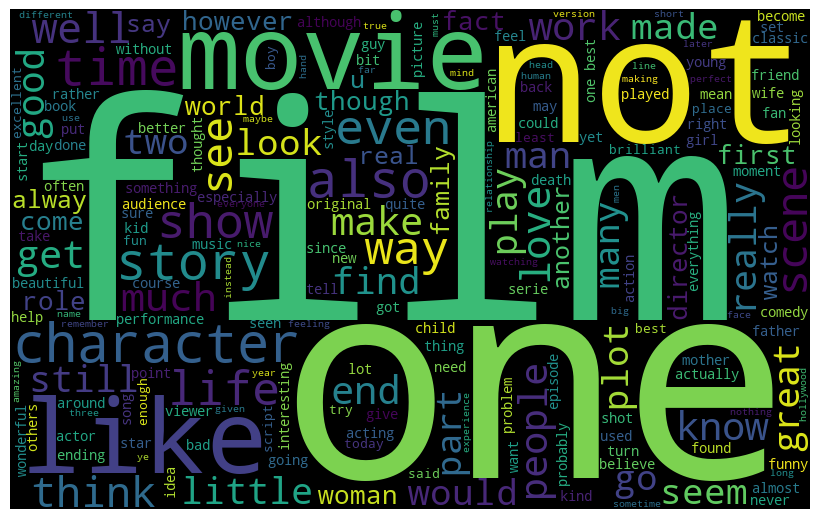

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Negative reviews word cloud

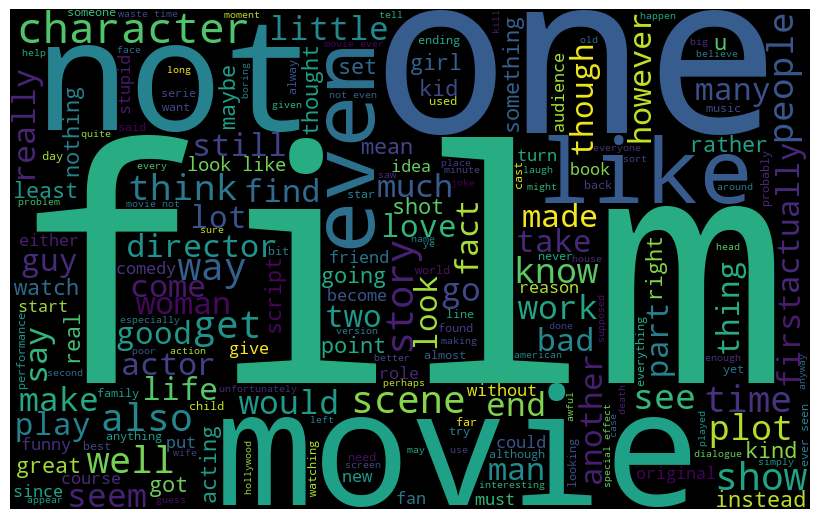

In [20]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Vectorizing Reviews

In [21]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


#### BOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19467)
X_test_review_bow shape:  (15000, 19467)


In [25]:
X_train_review_bow.toarray()[:2]  # displaying first two reviews in array format

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 19467))

Note: Here we have used `min_df=10` as we only want those words which occur at least 10 times in the whole corpus.

### TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19467)
X_test_review_tfidf shape:  (15000, 19467)


In [27]:
X_train_review_tfidf.toarray()[:2] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2, 19467))

### Building ML Classifiers

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model using the Bag of Words features
logreg.fit(X_train_review_bow, y_train)

# Predict the labels for the test set
y_pred_bow = logreg.predict(X_test_review_bow)

# Evaluate the model
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f'Accuracy (BOW): {accuracy_bow}')
print('Classification Report (BOW):')
print(classification_report(y_test, y_pred_bow))
print('Confusion Matrix (BOW):')
print(confusion_matrix(y_test, y_pred_bow))

# Train the model using the TF-IDF features
logreg.fit(X_train_review_tfidf, y_train)

# Predict the labels for the test set
y_pred_tfidf = logreg.predict(X_test_review_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Accuracy (TF-IDF): {accuracy_tfidf}')
print('Classification Report (TF-IDF):')
print(classification_report(y_test, y_pred_tfidf))
print('Confusion Matrix (TF-IDF):')
print(confusion_matrix(y_test, y_pred_tfidf))

Accuracy (BOW): 0.8735333333333334
Classification Report (BOW):
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7500
           1       0.87      0.88      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

Confusion Matrix (BOW):
[[6499 1001]
 [ 896 6604]]
Accuracy (TF-IDF): 0.8892666666666666
Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7500
           1       0.88      0.91      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Confusion Matrix (TF-IDF):
[[6548  952]
 [ 709 6791]]


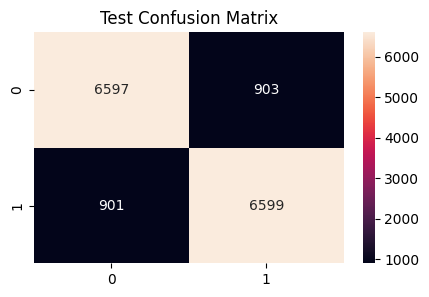

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

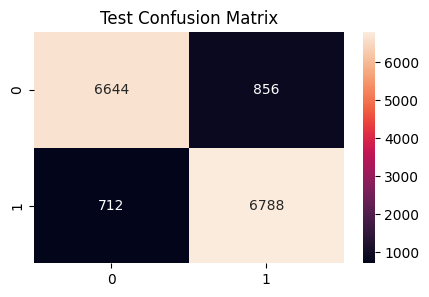

In [31]:
cm = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model using the Bag of Words features
xgb_model.fit(X_train_review_bow, y_train)

# Predict the labels for the test set
y_pred_bow_xgb = xgb_model.predict(X_test_review_bow)

# Evaluate the model
accuracy_bow_xgb = accuracy_score(y_test, y_pred_bow_xgb)
print(f'Accuracy (BOW + XGBoost): {accuracy_bow_xgb}')
print('Classification Report (BOW + XGBoost):')
print(classification_report(y_test, y_pred_bow_xgb))
print('Confusion Matrix (BOW + XGBoost):')
print(confusion_matrix(y_test, y_pred_bow_xgb))

# Train the model using the TF-IDF features
xgb_model.fit(X_train_review_tfidf, y_train)

# Predict the labels for the test set
y_pred_tfidf_xgb = xgb_model.predict(X_test_review_tfidf)

# Evaluate the model
accuracy_tfidf_xgb = accuracy_score(y_test, y_pred_tfidf_xgb)
print(f'Accuracy (TF-IDF + XGBoost): {accuracy_tfidf_xgb}')
print('Classification Report (TF-IDF + XGBoost):')
print(classification_report(y_test, y_pred_tfidf_xgb))
print('Confusion Matrix (TF-IDF + XGBoost):')
print(confusion_matrix(y_test, y_pred_tfidf_xgb))

/opt/homebrew/Caskroom/miniforge/base/envs/causal_ml_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [22:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy (BOW + XGBoost): 0.8563333333333333
Classification Report (BOW + XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7500
           1       0.84      0.87      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix (BOW + XGBoost):
[[6287 1213]
 [ 942 6558]]


/opt/homebrew/Caskroom/miniforge/base/envs/causal_ml_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [22:58:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy (TF-IDF + XGBoost): 0.8584666666666667
Classification Report (TF-IDF + XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      7500
           1       0.85      0.87      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix (TF-IDF + XGBoost):
[[6327 1173]
 [ 950 6550]]


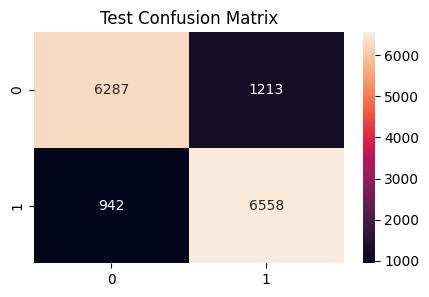

In [33]:
cm = confusion_matrix(y_test, y_pred_bow_xgb)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

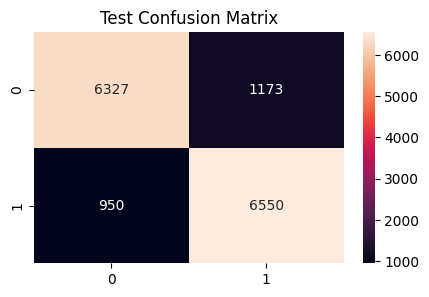

In [34]:
cm = confusion_matrix(y_test, y_pred_tfidf_xgb)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

Plotting the confusion matrix gives us information about how many of the data points are correctly and incorrectly classified by the model.